In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

In [2]:
data = pd.read_csv('diabetes_health_indicators.csv')
print(data)


        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        

In [7]:
data.groupby('Diabetes_012').count()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,...,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703
1.0,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631,...,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631
2.0,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346,...,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346


In [13]:
data.groupby(['Diabetes_012','HighBP']).count()

HighChol  CholCheck     BMI  Smoker  Stroke  \
Diabetes_012 HighBP                                                
0.0          0.0       134391     134391  134391  134391  134391   
             1.0        79312      79312   79312   79312   79312   
1.0          0.0         1718       1718    1718    1718    1718   
             1.0         2913       2913    2913    2913    2913   
2.0          0.0         8742       8742    8742    8742    8742   
             1.0        26604      26604   26604   26604   26604   

                     HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
Diabetes_012 HighBP                                                        
0.0          0.0                   134391        134391  134391   134391   
             1.0                    79312         79312   79312    79312   
1.0          0.0                     1718          1718    1718     1718   
             1.0                     2913          2913    2913     2913   
2.0          0.0                     8742          8742    8742     8742   
             1.0                    26604         26604   26604    26604   

                     HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  \
Diabetes_012 HighBP                                                           
0.0          0.0                134391         134391       134391   134391   
             1.0                 79312          79312        79312    79312   
1.0          0.0                  1718           1718         1718     1718   
             1.0                  2913           2913         2913     2913   
2.0          0.0                  8742           8742         8742     8742   
             1.0                 26604          26604        26604    26604   

                     MentHlth  PhysHlth  DiffWalk     Sex     Age  Education  \
Diabetes_012 HighBP                                                            
0.0          0.0       134391    134391    134391  134391  134391     134391   
             1.0        79312     79312     79312   79312   79312      79312   
1.0          0.0         1718      1718      1718    1718    1718       1718   
             1.0         2913      2913      2913    2913    2913       2913   
2.0          0.0         8742      8742      8742    8742    8742       8742   
             1.0        26604     26604     26604   26604   26604      26604   

                     Income  
Diabetes_012 HighBP          
0.0          0.0     134391  
             1.0      79312  
1.0          0.0       1718  
             1.0       2913  
2.0          0.0       8742  
             1.0      26604

In [14]:
split_data = data.groupby('Diabetes_012')
d1 = split_data.get_group(1)
c1 = d1.groupby('Age').Diabetes_012.count()
l1 = list(c1.index)
l21 = c1.values.tolist()

In [5]:
split_data = data.groupby('Diabetes_012')
d1 = split_data.get_group(1)
c1 = d1.groupby('Age').Diabetes_012.count()
l1 = list(c1.index)
l21 = c1.values.tolist()
d3 = split_data.get_group(2)
c3= d3.groupby('Age').Diabetes_012.count()
l3 = list(c3.index)
l31 = c3.values.tolist()
d2 = split_data.get_group(0)
c2 = d2.groupby('Age').Diabetes_012.count()
l = list(c2.index)
l2 = c2.values.tolist()
print(len(l))
print(len(l2))
print(len(l3))


plt.plot(l, l2, label="0")
plt.plot(l1, l21, label="1")
plt.plot(l1, l31, label="2")

plt.legend()
plt.xlabel('Age')
plt.ylabel('number of individuals')


13
13
13


Text(0, 0.5, 'number of individuals')

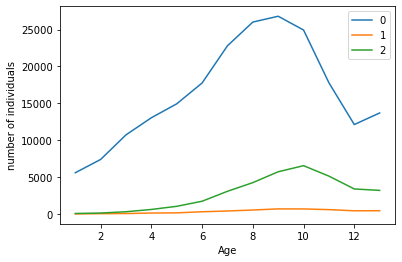

In [6]:
d2 = split_data.get_group(0)
c2 = d2.groupby('Age').Diabetes_012.count()
l = list(c2.index)
l2 = c2.values.tolist()
print(len(l))
print(len(l2))
print(len(l3))


plt.plot(l, l2, label="0")
plt.plot(l1, l21, label="1")
plt.plot(l1, l31, label="2")

plt.legend()
plt.xlabel('Age')
plt.ylabel('number of individuals')

c:\Users\Amine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


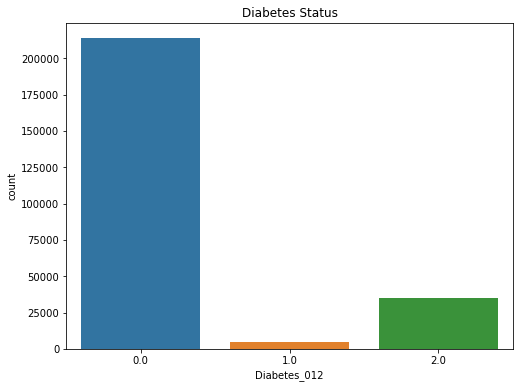

In [7]:
#visualize diabetes status
plt.figure(figsize = (8,6))
sns.countplot(data['Diabetes_012'])
plt.title("Diabetes Status")
plt.show()

In [17]:
#group diabetes status & BP
diabetes_bp = data.groupby(['Diabetes_012','HighBP']).count()
diabetes_bp = data.groupby(['Diabetes_012','HighBP']).size().reset_index(name='Count')
print(diabetes_bp)

   Diabetes_012  HighBP   Count
0           0.0     0.0  134391
1           0.0     1.0   79312
2           1.0     0.0    1718
3           1.0     1.0    2913
4           2.0     0.0    8742
5           2.0     1.0   26604


In [20]:
#visualize diabetes status ~ BP
plt.figure(figsize = (8,6))
sns.barplot(x ='Diabetes_02', y = 'Count', hue = 'HighBP', data = diabetes_bp, palette = 'Set1')
plt.title("Dibaetes Status ~ BP")
plt.show()

ValueError: Could not interpret input 'Diabetes_02'

<Figure size 576x432 with 0 Axes>

In [ ]:
#group diabetes status & cholesterol check
diabetes_check = data.groupby(['Diabetes_binary', 'CholCheck']).size().reset_index(name = 'Count')
print(diabetes_check)

diabetes Mental Health  

In [25]:
data1 = pd.read_csv('trans1diabetes.csv')

In [26]:
data1.MentHlth[data1['MentHlth'] == 20.0] = 'Excelent'

<ipython-input-26-94e80f448171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.MentHlth[data1['MentHlth'] == 20.0] = 'Excelent'


In [27]:
data1.to_csv('trans2diabetes.csv')

In [28]:
data2 = pd.read_csv('trans2diabetes.csv')

In [29]:
diabetes_Mental = data2.groupby(['Diabetes_012', 'MentHlth']).size().reset_index(name = 'Count')
print(diabetes_Mental)

   Diabetes_012   MentHlth   Count
0      Diabetes       20.0     663
1      Diabetes   Excelent    3220
2      Diabetes   Not good    1463
3      Diabetes       Poor   28928
4      Diabetes  very good    1072
5   No Diabetes       20.0    2624
6   No Diabetes   Excelent   10603
7   No Diabetes   Not good    7082
8   No Diabetes       Poor  188845
9   No Diabetes  very good    4549
10  PreDiabetes       20.0      77
11  PreDiabetes   Excelent     423
12  PreDiabetes   Not good     205
13  PreDiabetes       Poor    3787
14  PreDiabetes  very good     139


In [30]:
MentHlth = diabetes_Mental.groupby(['Diabetes_012']).sum()
MentHlth

,Count
Diabetes_012,
Diabetes,35346
No Diabetes,213703
PreDiabetes,4631


In [31]:
Temp1 = diabetes_Mental.set_index('Diabetes_012').join(MentHlth,rsuffix='_')
Temp1['Percentage'] = Temp1['Count']/Temp1['Count_']
Temp1
Temp1 = Temp1.reset_index()

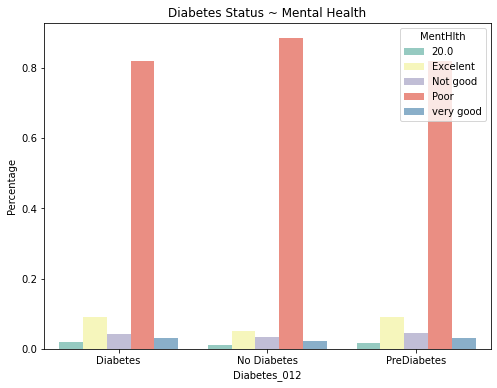

In [32]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_012', y = 'Percentage', hue = 'MentHlth', data = Temp1, palette = 'Set3')
plt.title("Diabetes Status ~ Mental Health")
plt.show()

Diabetes~BMI 